# Practical Linear Algebra for Data Science
## Mike X Cohen (sincxpress.com)
### https://www.oreilly.com/library/view/practical-linear-algebra/9781098120603/

#### Code for chapter 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz


# NOTE: these lines define global figure properties used for publication.
from IPython import display
display.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

/var/folders/8_/1s5ps_mn2158pygkkqf7rh440000gn/T/ipykernel_15169/1647904893.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # print figures in svg format


In [2]:
v = np.array([[1,2,3]]).T # col vector
w = np.array([[10,20]])   # row vector
v + w

array([[11, 21],
       [12, 22],
       [13, 23]])

# Visualizing matrices as images

In [14]:
# create some matrices
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8),np.arange(10))

array([[ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9],
       [-1,  0, -1, -2, -3, -4, -5, -6, -7, -8],
       [-2, -1,  0, -1, -2, -3, -4, -5, -6, -7],
       [-3, -2, -1,  0, -1, -2, -3, -4, -5, -6],
       [-4, -3, -2, -1,  0, -1, -2, -3, -4, -5],
       [-5, -4, -3, -2, -1,  0, -1, -2, -3, -4],
       [-6, -5, -4, -3, -2, -1,  0, -1, -2, -3],
       [-7, -6, -5, -4, -3, -2, -1,  0, -1, -2]])

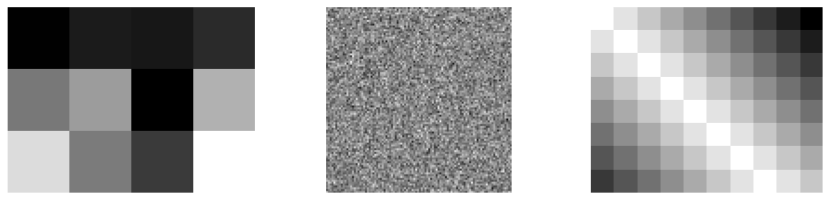

In [12]:
# and show them as images
fig,axs = plt.subplots(1,3,figsize=(12.5,3))

axs[0].imshow(A,cmap='gray')
axs[1].imshow(B,cmap='gray')
axs[2].imshow(C,cmap='gray')

for i in range(3): axs[i].axis('off')
plt.tight_layout()
plt.savefig('Figure_05_01.png',dpi=300)
plt.show()

# Slicing out rows and columns

In [15]:
# create a matrix
A = np.reshape(np.arange(1,10),(3,3))
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [16]:
# get the n-th row
print( A[1,:] )

# note that to extract only one row, you don't need the column indices. 
print( A[1] )

# But that's potentially confusing, so I recommend avoiding that notation.

[4 5 6]
[4 5 6]


In [17]:
# get the n-th column
print( A[:,1] )
# Note that it prints out as a "row" even thought it's a column of the matrix

[2 5 8]


In [18]:
# multiple rows
A[0:2,:]

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
# multiple columns
A[:,1:]

array([[2, 3],
       [5, 6],
       [8, 9]])

In [20]:
## extracting a submatrix (multiple rows and cols)

# The goal here is to extract a submatrix from matrix A. Here's A:
# [[1 2 3]
#  [4 5 6]
#  [7 8 9]]

# And we want rows 0-1 and columns 0-1, thus:
# [[1 2]
#  [4 5]]


# seems like this should work...
print( A[0:2,1:2] )
print(' ')

# but this does (remember x:y:z slices from x to y-1 in steps of z)
print(A[0:2:1, 0:2:1])

[[2]
 [5]]
 
[[1 2]
 [4 5]]


In [21]:
# This cell has the example shown in the book.

# the full matrix
A = np.arange(60).reshape(6,10)

# a block of it
sub = A[1:4:1,0:5:1]


# print them out
print('Original matrix:\n')
print(A)

print('\n\nSubmatrix:\n')
print(sub)

Original matrix:

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]


Submatrix:

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


# Some special matrices

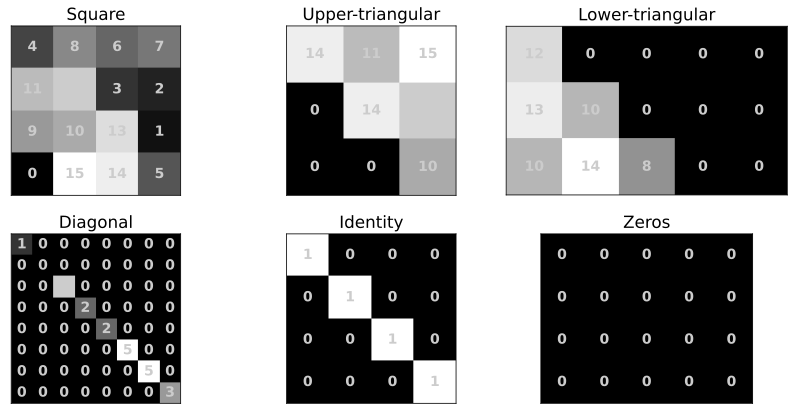

In [22]:
## create some matrices

# square
M1 = np.random.permutation(16).reshape(4,4)

# upper-triangular square
M2 = np.triu(np.random.randint(10,20,(3,3)))

# lower-triangular rectangular
M3 = np.tril(np.random.randint(8,16,(3,5)))

# diagonal
M4 = np.diag( np.random.randint(0,6,size=8) )

# identity
M5 = np.eye(4,dtype=int)

# zeros
M6 = np.zeros((4,5),dtype=int)

matrices  = [ M1,M2,M3,M4,M5,M6 ]
matLabels = [ 'Square','Upper-triangular','Lower-triangular','Diagonal','Identity','Zeros'  ]


_,axs = plt.subplots(2,3,figsize=(12,6))
axs = axs.flatten()

for mi,M in enumerate(matrices):
  axs[mi].imshow(M,cmap='gray',origin='upper',
                 vmin=np.min(M),vmax=np.max(M))
  axs[mi].set(xticks=[],yticks=[])
  axs[mi].set_title(matLabels[mi])
  
  # text labels
  for (j,i),num in np.ndenumerate(M):
    axs[mi].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontweight='bold')



plt.savefig('Figure_05_02.png',dpi=300)
plt.tight_layout()
plt.show()

# Some more details about special matrices

In [23]:
# matrix size parameters (called 'shape' in Python lingo)
Mrows = 4 # shape 0
Ncols = 6 # shape 1

# create the matrix!
A = np.random.randn(Mrows,Ncols)

# print out the matrix (rounding to facilitate visual inspection)
np.round(A,3)

array([[-0.38 , -1.357,  1.171, -0.533,  0.417,  0.526],
       [ 0.065, -0.032,  0.238, -0.066, -1.15 ,  0.006],
       [ 0.863,  0.108,  1.152, -0.884,  0.313,  0.687],
       [ 0.471,  0.922,  0.164, -0.922, -0.172, -0.054]])

In [24]:
# Extract the triangular part of a dense matrix

M = 4
N = 6
A = np.random.randn(M,N)

# upper triangular
print('Upper triangular:\n')
print(np.triu(A))

# lower triangular
print('\n\nLower triangular:\n')
print(np.tril(A))

Upper triangular:

[[-0.06605029 -0.71803738  0.9973676  -1.91944274 -0.10521507 -0.56665768]
 [ 0.          1.23374264 -1.50350784  0.68421026 -0.05462481  0.03510135]
 [ 0.          0.         -0.16592448 -1.01390402 -1.69000184  1.42062703]
 [ 0.          0.          0.         -0.55757902  2.34460012 -0.59712183]]


Lower triangular:

[[-0.06605029  0.          0.          0.          0.          0.        ]
 [ 0.55251152  1.23374264  0.          0.          0.          0.        ]
 [ 1.65513841 -0.35815982 -0.16592448  0.          0.          0.        ]
 [-0.58653375  1.18392238 -1.92412624 -0.55757902  0.          0.        ]]


In [25]:
# Diagonal

# input a matrix to get the diagonal elements
A = np.random.randn(5,5)
d = np.diag(A)
print('Input a matrix:\n',d)

# OR input a vector to create a diagonal matrix!
v = np.arange(1,6)
D = np.diag(v)
print('\n\nInput a vector:\n',D)

Input a matrix:
 [ 0.56010468 -0.19825508 -1.28890783  0.86861925 -0.34102173]


Input a vector:
 [[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [26]:
# Identity and zeros matrices

# Note that you only specify one input
n = 4
I = np.eye(n)
print(f'The {n}x{n} identity matrix:\n',I)


The 4x4 identity matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [27]:
# Zeros matrix

# Important: All shape parameters are given as one input (a tuple or list),
#            unlike np.random.randn()
n = 4
m = 5
I = np.zeros((n,m))
print(f'The {n}x{m} zeros matrix:\n',I)

The 4x5 zeros matrix:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


# Matrix addition

In [33]:
A = np.array([  [2,3,4],
                [1,2,4] ])

B = np.array([  [ 0, 3,1],
                [-1,-4,2] ])

print(A+B)

[[ 2  6  5]
 [ 0 -2  6]]


# Shifting a matrix

In [29]:
# Not shifting; broadcasting scalar addition
3 + np.eye(2)

array([[4., 3.],
       [3., 4.]])

In [30]:
# This is shifting:

# the matrix
A = np.array([ [4,5, 1],
               [0,1,11],
               [4,9, 7]  ])

# the scalar
s = 6

print('Original matrix:')
print(A), print(' ')

# as in the previous cell, this is broadcasting addition, not shifting
print('Broadcasting addition:')
print(A + s), print(' ')

# This is shifting
print('Shifting:')
print( A + s*np.eye(len(A)) )

Original matrix:
[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
 
Broadcasting addition:
[[10 11  7]
 [ 6  7 17]
 [10 15 13]]
 
Shifting:
[[10.  5.  1.]
 [ 0.  7. 11.]
 [ 4.  9. 13.]]


# Scalar multiplication

In [31]:
print(A), print(' ')
print(s*A)

[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
 
[[24 30  6]
 [ 0  6 66]
 [24 54 42]]


# Hadamard multiplication

In [5]:
# two random matrices
A = np.random.randn(3,4)
B = np.random.randn(3,4)

# this is Hadamard multiplication
print(A*B)

print('')
# and so is this
print(np.multiply(A,B))

# this one is NOT Hadamard multiplication
# A@B

[[-2.1928299  -0.04440882 -0.00605681  1.14737487]
 [-0.03761285  0.62431481  0.00581369  0.36547228]
 [ 0.27395744 -0.16141176  2.26117584 -0.14052165]]

[[-2.1928299  -0.04440882 -0.00605681  1.14737487]
 [-0.03761285  0.62431481  0.00581369  0.36547228]
 [ 0.27395744 -0.16141176  2.26117584 -0.14052165]]


# "Standard" matrix multiplication

In [9]:
# Create a few matrices
A = np.random.randn(3,6)
B = np.random.randn(6,4)
C = np.random.randn(6,4)

# try some multiplications, and print out the shape of the product matrix
print( (np.matmul(A, B)).shape )

print( np.dot(A,B).shape ) # same as above


print( (np.matmul(B,C)).shape )
print( (np.matmul(A,C)).shape )

(3, 4)
(3, 4)


In [3]:
# Note/reminder:

# This is Hadamard (element-wise) multiplication:
print( np.multiply(B,C) ), print(' ')

# This is matrix multiplication
print( np.dot(B,C.T) )

# demonstration:
# np.dot(B,C.T)-B@C.T

NameError: name 'B' is not defined

# Geometry of matrix-vector multiplication

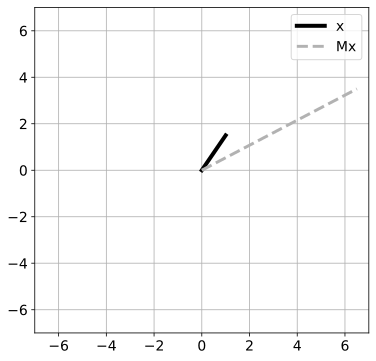

In [10]:
# some matrix
M  = np.array([ [2,3],[2,1] ])
x  = np.array([ [1,1.5] ]).T # transposed into a column vector!
Mx = M@x


plt.figure(figsize=(6,6))

plt.plot([0,x[0,0]],[0,x[1,0]],'k',linewidth=4,label='x')
plt.plot([0,Mx[0,0]],[0,Mx[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mx')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.savefig('Figure_05_05a.png',dpi=300)
plt.show()

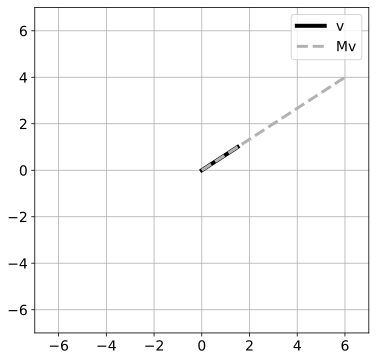

In [11]:
# some matrix
M  = np.array([ [2,3],[2,1] ])
v  = np.array([ [1.5,1] ]).T # transposed into a column vector!
Mv = M@v


plt.figure(figsize=(6,6))

plt.plot([0,v[0,0]],[0,v[1,0]],'k',linewidth=4,label='v')
plt.plot([0,Mv[0,0]],[0,Mv[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mv')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.savefig('Figure_05_05b.png',dpi=300)
plt.show()

# Transpose

In [ ]:
# A matrix to transpose
A = np.array([ [3,4,5],[1,2,3] ])

A_T1 = A.T # as method
A_T2 = np.transpose(A) # as function

# double-transpose
A_TT = A_T1.T 


# print them
print( A_T1 ), print(' ')
print( A_T2 ), print(' ')
print( A_TT )

# Exercise 1

In [ ]:
# indexing

A = np.arange(12).reshape(3,4)
print(A)

# find the element in the 2nd row, 4th column
ri = 1
ci = 3

print(f'The matrix element at index ({ri+1},{ci+1}) is {A[ri,ci]}')

# Exercise 2

In [ ]:
# Create the matrix
C = np.arange(100).reshape((10,10))

# extract submatrix
C_1 = C[0:5:1,0:5:1]

# here's what the matrices look like
print(C), print(' ')
print(C_1)



# visualize the matrices as maps
_,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(C,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[0].plot([4.5,4.5],[-.5,9.5],'w--')
axs[0].plot([-.5,9.5],[4.5,4.5],'w--')
axs[0].set_title('Original matrix')
# text labels
for (j,i),num in np.ndenumerate(C):
  axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')


axs[1].imshow(C_1,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[1].set_title('Submatrix')
# text labels
for (j,i),num in np.ndenumerate(C_1):
  axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')


plt.savefig('Figure_05_06.png',dpi=300)
plt.show()

# Exercise 3


In [ ]:
# cut it into blocks
C_1 = C[0:5:1,0:5:1]
C_2 = C[0:5:1,5:10:1]
C_3 = C[5:10:1,0:5:1]
C_4 = C[5:10:1,5:10:1]

# rearrange the blocks
newMatrix = np.vstack( (np.hstack((C_4,C_3)),
                        np.hstack((C_2,C_1))) )


# visualize the matrices
_,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(C,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[0].plot([4.5,4.5],[-.5,9.5],'w--')
axs[0].plot([-.5,9.5],[4.5,4.5],'w--')
axs[0].set_title('Original matrix')
# text labels
for (j,i),num in np.ndenumerate(C):
  axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')


axs[1].imshow(newMatrix,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[1].plot([4.5,4.5],[-.5,9.5],'w--')
axs[1].plot([-.5,9.5],[4.5,4.5],'w--')
axs[1].set_title('Block-shifted')
# text labels
for (j,i),num in np.ndenumerate(newMatrix):
  axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')

plt.savefig('Figure_05_07.png',dpi=300)
plt.show()

# Exercise 4

In [ ]:
def addMatrices(A,B):

  # check that both matrices have the same size
  if A.shape != B.shape:
    raise('Matrices must be the same size!')

  # initialize sum matrix
  C = np.zeros(A.shape)

  # sum!
  for i in range(A.shape[0]):
    for j in range(A.shape[1]):
      C[i,j] = A[i,j] + B[i,j]
  
  return C


# test the function
M1 = np.zeros((6,4))
M2 = np.ones((6,4))

addMatrices(M1,M2)


# Exercise 5

In [ ]:
# create random matrices and a scalar
A = np.random.randn(3,4)
B = np.random.randn(3,4)
s = np.random.randn()

# equations shown in the text
expr1 = s*(A+B)
expr2 = s*A + s*B
expr3 = A*s + B*s


# There are a few ways to test for 3-way equality. 
# My choice below is that if x=y=z, then 2x-y-z=0.

# print out, rounded to 8 digits after the decimal point
print(np.round(2*expr1 - expr2 - expr3,8))

# Exercise 6

In [ ]:
# generate two matrices
m = 4
n = 6
A = np.random.randn(m,n);
B = np.random.randn(n,m)

# build up the product matrix element-wise
C1 = np.zeros((m,m))
for rowi in range(m):
  for coli in range(m):
    C1[rowi,coli] = np.dot( A[rowi,:],B[:,coli] )
    


# implement matrix multiplication directly
C2 = A@B

# compare the results (using isclose(); results should be a matrix of TRUEs)
np.isclose( C1,C2 )

# Exercise 7

In [ ]:
# Create the matrices
L = np.random.randn(2,6)
I = np.random.randn(6,3)
V = np.random.randn(3,5)
E = np.random.randn(5,2)

# multiplications indicated in the instructions
res1 = ( L@I@V@E ).T
# res2 = L.T @ I.T @ V.T @ E.T
res3 = E.T @ V.T @ I.T @ L.T

# show that res1 and res3 are the same (within rounding error tolerance)
print(res1-res3)

# Exercise 8

In [ ]:
def isMatrixSymmetric(S):
  
  # difference between matrix and its transpose
  D = S-S.T

  # check whether sum of squared errors (SSE) is smaller than a threshold
  sse = np.sum(D**2)

  # output TRUE if sse is tiny; FALSE means the matrix is asymmetric
  return sse<10**-15

# note: There are many other ways you could solve this. 
# If you want to explore different methods, consider np.all() or np.isclose()

In [ ]:
# create symmetric and nonsymmetric matrices
A = np.random.randn(4,4)
AtA = A.T@A

# test!
print(isMatrixSymmetric(A))
print(isMatrixSymmetric(AtA))

# Exercise 9

In [ ]:
# create symmetric and nonsymmetric matrices
A = np.random.randn(4,4)
AtA = (A + A.T) / 2 # additive method!

# test!
print(isMatrixSymmetric(A))
print(isMatrixSymmetric(AtA))

# Exercise 10

In [ ]:
import plotly.graph_objects as go

# As a matrix with two columns in R3, instead of two separate vectors
A = np.array( [ [3,0],
                [5,2],
                [1,2] ] )

# uncomment the line below
# A = np.array( [ [3,1.5],
#                 [5,2.5],
#                 [1, .5] ] )


xlim = [-4,4]
scalars = np.random.uniform(low=xlim[0],high=xlim[1],size=(100,2))

# create random points
points = np.zeros((100,3))
for i in range(len(scalars)):
  points[i,:] = A@scalars[i]

# draw the dots in the figure
fig = go.Figure( data=[go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers')])
fig.show()

# Exercise 11

In [ ]:
n = 4

# create "base" matrices
O = np.ones((n,n))
D = np.diag(np.arange(1,n+1)**2)
S = np.sqrt(D)

# pre- and post-multiply
pre = D@O
pst = O@D

# and both
both = S@O@S



# print out the "base" matrices
print('Ones matrix:')
print(O), print(' ')

print('Diagonal matrix:')
print(D), print(' ')

print('Sqrt-diagonal matrix:')
print(S), print(' ')



print('Pre-multiply by diagonal:')
print(pre), print(' ')

print('Post-multiply by diagonal:')
print(pst), print(' ')

print('Pre- and post-multiply by sqrt-diagonal:')
print(both)

# Exercise 12

In [ ]:
# Create two diagonal matrices
N = 5
D1 = np.diag( np.random.randn(N) )
D2 = np.diag( np.random.randn(N) )

# two forms of multiplication
hadamard = D1*D2
standard = D1@D2

# compare them
hadamard - standard